## Формулы
- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

## Изображение для визуализации концепции
![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

In [ ]:
!python3 -m pip install -r requirements.txt

In [2]:
# Импорт необходимых модулей
import random
import matplotlib.pyplot as plt

In [22]:
# Инициализация количества "бросков"
num_points = 2000

In [38]:
%lsmagic
# Здесь мы "бросаем дротики" и подсчитываем количество попаданий
points = []
hits = 0
for _ in range(num_points):
  x, y = random.random(), random.random()
  if x*x + y*y < 1.0:
    hits += 1
    ##points.append((x, y2, True))
    points.append((x, y, "green"))
  else:
    points.append((x, y, "yellow"))

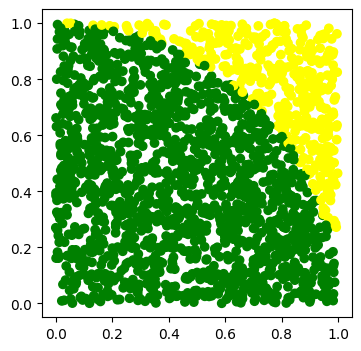

In [39]:
# Распакуем точки в 3 списка
x, y, colors = zip(*points)
# Определяем размеры фигуры
fig, ax = plt.subplots()
fig.set_size_inches(4.0, 4.0)
# Рисуем результат
ax.scatter(x, y, c=colors)

In [40]:
# Считаем оценку
fraction = hits / num_points
4 * fraction

3.182

In [42]:
import random
from ipywidgets import interact, widgets
%matplotlib inline
from matplotlib import pyplot
def throw_darts(num_points):
  points = []
  hits = 0
  for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
      hits += 1
      points.append((x, y, True))
    else:
      points.append((x, y, False))
  fraction = hits / num_points
  pi = 4 * fraction
  return pi, points
def create_plot(points):
  x, y, colors = zip(*points)
  pyplot.scatter(x, y, c=colors)
def experiment(num_points):
  pi, points = throw_darts(num_points)
  create_plot(points)
  print("approximation:", pi)

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

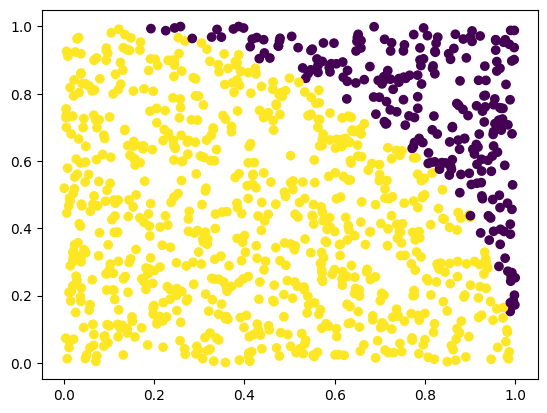

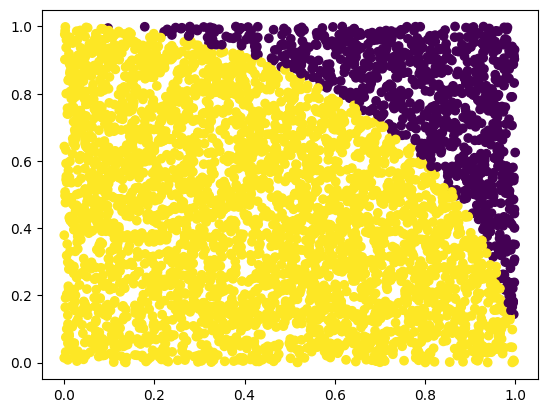

In [45]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100,
value=1000))

In [44]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian(x, a, b, c):
  return a * np.exp(-b * (x-c)**2)
def noisy_gaussian():
  # gaussian array y in interval -5 <= x <= 5
  nx = 100
  x = np.linspace(-5.0, 5.0, nx)
  y = gaussian(x, a=2.0, b=0.5, c=1.5)
  noise = np.random.normal(0.0, 0.2, nx)
  y += noise
  return x, y
def fit(x, y, n):
  pfit = np.polyfit(x, y, n)
  yfit = np.polyval(pfit, x)
  return yfit
def plot(x, y, yfit):
  plt.plot(x, y, "r", label="Data")
  plt.plot(x, yfit, "b", label="Fit")
  plt.legend()
  plt.ylim(-0.5, 2.5)
  plt.show()
  x, y = noisy_gaussian()
@interact
def slider(n=(3, 30)):
  yfit = fit(x, y, n)
  plot(x, y, yfit)

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def step():
  import random
  return 1. if random.random() > .5 else -1.

In [52]:
def walk(n):
  x = np.zeros(n)
  dx = 1. / n
  for i in range(n - 1):
    x_new = x[i] + dx * step()
    if x_new > 5e-3:
      x[i + 1] = 0.
    else:
      x[i + 1] = x_new
  return x

In [53]:
n = 100000
x = walk(n)

71.1 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


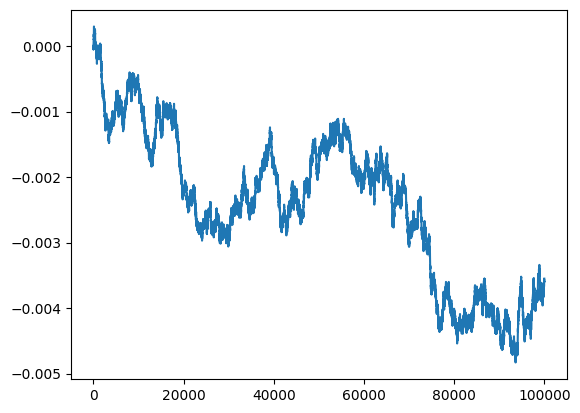

In [54]:
t1 = %timeit -o walk(n)
plt.plot(x)

In [59]:
t1.best

0.06912766129999

In [55]:
%%prun
walk(n)

In [60]:
!pip install line_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 6.8 MB/s eta 0:00:00


In [61]:
%load_ext line_profiler

In [62]:
%lprun?

In [63]:
%lprun -f walk walk(10000)

In [64]:
%lprun -f step walk(10000)

In [66]:
## Импорт библиотек - использовать вне цикла,
## Подтяни все зависимости в одной из первых ячеек - одного раза хватит